In [7]:
# This is a  classification  problem
#Target variable - Label  column

import numpy as np

import pandas as pd
df=pd.read_csv('CROP DATA.csv') 
print(df)

       N   P    K   ph    EC        S     Cu      Fe      Mn     Zn      B  \
0    143  69  217  5.9  0.58  0.23000  10.20  116.35   59.96  54.85  21.29   
1    170  36  216  5.9  0.15  0.28000  15.69  114.20   56.87  31.28  28.62   
2    158  66  219  6.8  0.34  0.20000  15.29   65.87   51.81  57.12  27.59   
3    133  45  207  6.4  0.94  0.21000   8.48  103.10   43.81  68.50  47.29   
4    132  48  218  6.7  0.54  0.19000   5.59   63.40   56.40  46.71  31.04   
..   ...  ..  ...  ...   ...      ...    ...     ...     ...    ...    ...   
615   41  23  135  5.0  1.67  0.10655  26.00   39.20  206.89  31.09  20.64   
616   49  45   90  5.8  1.98  0.09229  19.00   40.20   91.12  32.68  14.91   
617  131  24  121  4.9  2.24  0.08775  22.00   40.00   94.34  24.93  23.74   
618  131  55  130  5.3  2.48  0.08983  15.00   41.00   92.58  45.73  21.48   
619  129  34  160  4.8  1.08  0.08869  25.00   39.00  259.93  33.49  14.16   

     ENCODE        label  
0         0  pomegranate  
1        

In [8]:
desc_stats=df.describe()
print(desc_stats)


                N           P           K          ph          EC           S  \
count  620.000000  620.000000  620.000000  620.000000  620.000000  620.000000   
mean   135.701613   52.508065  161.401613    6.106290    0.885468    0.484085   
std     31.808083   24.673538   81.285780    0.693782    0.637214    5.775388   
min     30.000000   10.000000   51.000000    4.500000    0.010000    0.011100   
25%    116.000000   30.000000   89.000000    5.700000    0.297500    0.086000   
50%    138.000000   54.000000  157.500000    6.100000    0.780000    0.168000   
75%    160.000000   75.000000  206.000000    6.500000    1.390000    0.240000   
max    198.000000  100.000000  369.000000    8.000000    2.480000  113.200000   

               Cu          Fe           Mn          Zn           B      ENCODE  
count  620.000000  620.000000   620.000000  620.000000  620.000000  620.000000  
mean    17.315452  117.212500   219.905887   34.340839   28.750710    2.483871  
std      6.441150   62.7751

In [12]:
numeric_df = df.drop("label",  axis=1)

corr_matrix=numeric_df.corr()
print(corr_matrix)

               N         P         K        ph        EC         S        Cu  \
N       1.000000 -0.065671  0.183285  0.354199 -0.301646 -0.083626 -0.017519   
P      -0.065671  1.000000  0.513214  0.042980  0.202738 -0.048939 -0.373229   
K       0.183285  0.513214  1.000000  0.274853  0.363129 -0.033859 -0.198268   
ph      0.354199  0.042980  0.274853  1.000000 -0.306050 -0.011831  0.011482   
EC     -0.301646  0.202738  0.363129 -0.306050  1.000000  0.067136  0.091337   
S      -0.083626 -0.048939 -0.033859 -0.011831  0.067136  1.000000 -0.150109   
Cu     -0.017519 -0.373229 -0.198268  0.011482  0.091337 -0.150109  1.000000   
Fe      0.206822 -0.063169 -0.012313  0.438771 -0.338141 -0.098775  0.208911   
Mn      0.069939 -0.535664 -0.412358  0.089584 -0.158526 -0.005194  0.480128   
Zn     -0.026355  0.006488 -0.154297 -0.133763 -0.165028 -0.010924 -0.314798   
B      -0.224705  0.234306 -0.316088 -0.236816 -0.258056 -0.038572 -0.320314   
ENCODE -0.153085 -0.114639  0.129782 -0.

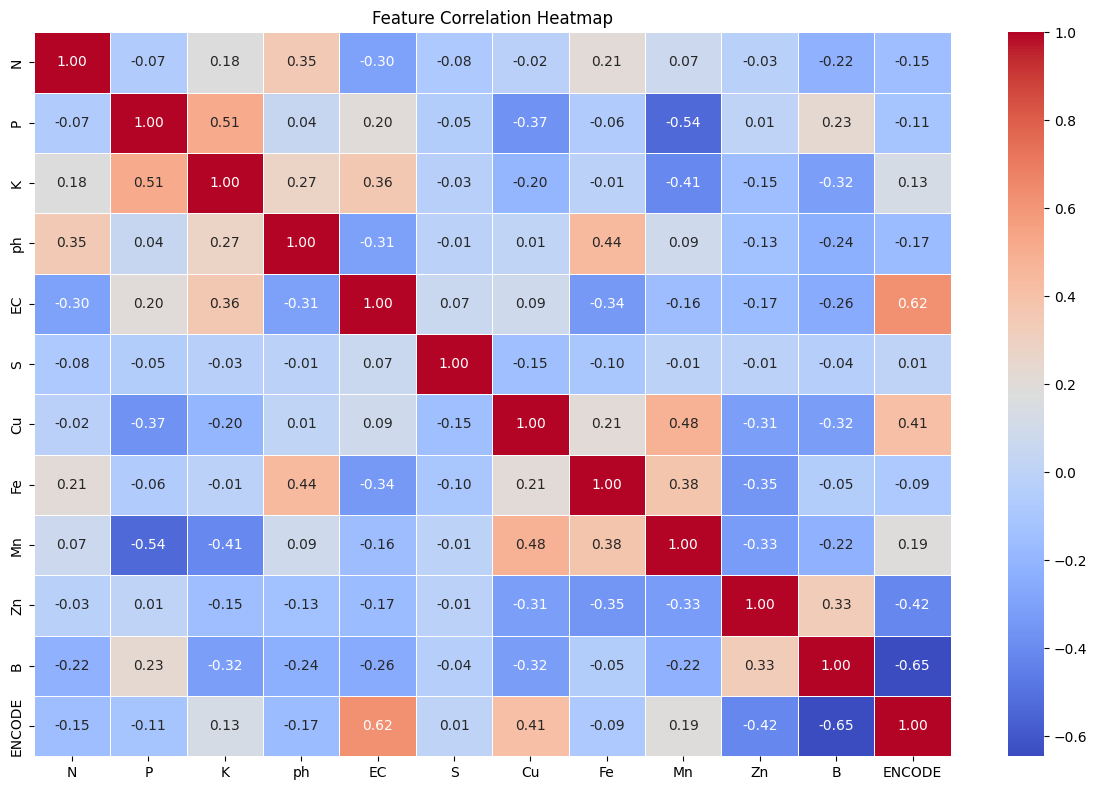

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Drop the 'label' column but keep 'ENCODE'
corr_matrix = df.drop("label", axis=1).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("CROP DATA.csv")  # Replace with your filename

# Drop 'ENCODE' and 'label' from the features
X = df.drop(columns=["ENCODE", "label"])

# Set the target (assumed to be 'ENCODE')
y = df["ENCODE"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.97


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("CROP DATA.csv")  # Replace with your actual file

# Drop 'ENCODE' and 'label' from the features
X = df.drop(columns=["ENCODE", "label"])

# Set the target (assumed to be the encoded crop type)
y = df["ENCODE"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.98


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# For Decision Tree
print("Decision Tree Report:")
print(classification_report(y_test, y_pred))

# For Random Forest
print("Random Forest Report:")
print(classification_report(y_test, y_pred))

Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.94      0.94      0.94        18
           2       0.96      0.96      0.96        24
           3       1.00      1.00      1.00        21
           4       0.94      1.00      0.97        16
           5       1.00      1.00      1.00        23

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.97       124
weighted avg       0.98      0.98      0.98       124

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.94      0.94      0.94        18
           2       0.96      0.96      0.96        24
           3       1.00      1.00      1.00        21
           4       0.94      1.00      0.97        16
           5       1.00      1.00      1.00        23

    accuracy                     

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the models first
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
dt_scores = cross_val_score(dt_model, X, y, cv=5)
rf_scores = cross_val_score(rf_model, X, y, cv=5)

# Print average CV accuracy
print("Decision Tree CV Accuracy:", dt_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())

Decision Tree CV Accuracy: 0.95
Random Forest CV Accuracy: 0.967741935483871


In [24]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("CROP DATA.csv")  # Replace with your actual file name

# Drop 'ENCODE' and 'label' from the features
X = df.drop(columns=["ENCODE", "label"])  # Features
y = df["ENCODE"]  # Target (encoded crop type)

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA - Reduce to 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Optional: Print PCA details
print("\nPCA-transformed shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)  # You can try 'linear', 'poly', or 'rbf'
svm_model.fit(X_train, y_train)

# Step 5: Prediction and Evaluation
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Accuracy after PCA and Scaling: {accuracy:.2f}")


PCA-transformed shape: (620, 5)
Explained variance ratio: [0.24241085 0.18589638 0.16086378 0.09952772 0.0926424 ]

SVM Accuracy after PCA and Scaling: 0.95


In [26]:
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Accuracy after PCA and Scaling: {accuracy:.2f}")

# Precision, Recall, F1-Score
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Accuracy after PCA and Scaling: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.94      0.94      0.94        18
           2       0.95      0.88      0.91        24
           3       1.00      1.00      1.00        21
           4       0.94      1.00      0.97        16
           5       0.96      1.00      0.98        23

    accuracy                           0.95       124
   macro avg       0.95      0.95      0.95       124
weighted avg       0.95      0.95      0.95       124



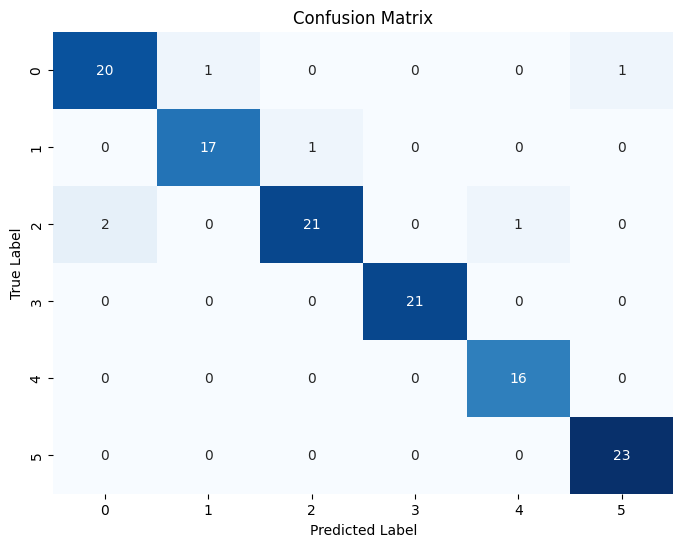

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
# CHOOSE THE RANDOM FOREST MODEL 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("CROP DATA.csv")  # Replace with your actual file

# Drop 'ENCODE' and 'label' from the features
X = df.drop(columns=["ENCODE", "label"])

# Set the target (assumed to be the encoded crop type)
y = df["ENCODE"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")



import pickle

# Save the model to a file using pickle
with open("crop_rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as crop_rf_model.pkl")

Random Forest Accuracy: 0.98
Model saved as crop_rf_model.pkl
